
<a href="https://colab.research.google.com/github/kokchun/Databehandling-AI22/blob/main/Exercises/E00_pandas_basic_syntax.ipynb" target="_parent"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> &nbsp; to see hints and answers.

# pandas fundamentals exercises

---
These are introductory exercises in Pandas with focus in **syntax, DataFrame, indexing, data selection** and **data cleaning**.

<p class = "alert alert-info" role="alert"><b>Note</b> that there are usually many ways to achieve same results using operations in pandas. Feel free to investigate several ways. </p>

<p class = "alert alert-info" role="alert"><b>Note</b> that in cases when you start to repeat code, try not to. Create functions to reuse code instead. </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to use <b>descriptive variable, function, index </b> and <b> column names</b> in order to get readable code </p>

<p class = "alert alert-info" role="alert"><b>Remember</b> to format your input questions in a pedagogical way to guide the user

The number of stars (\*), (\*\*), (\*\*\*) denotes the difficulty level of the task

---

## 1. Cities in Sweden - create dataset (*)

Create this DataFrame from scratch: 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Malmö     |       347949 |
|  1 | Stockholm |       975551 |
|  2 | Uppsala   |       233839 |
|  3 | Göteborg  |       583056 |

&nbsp; a) Use your DataFrame to print out all the cities. (*)

&nbsp; b) Select only the row which contains Göteborg. Do this by using the name Göteborg. (*)

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the three largest cities. (*)

&nbsp; e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city. 


<details>

<summary>Answer</summary>

a) 

```
0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
```

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |
|  3 | Uppsala   |       233839 |


d)

|    | Kommun    |   Population |
|---:|:----------|-------------:|
|  0 | Stockholm |       975551 |
|  1 | Göteborg  |       583056 |
|  2 | Malmö     |       347949 |

e)

|    | Kommun    |   Population |   Population (%) |
|---:|:----------|-------------:|-----------------:|
|  0 | Stockholm |       975551 |              9.4 |
|  1 | Göteborg  |       583056 |              5.6 |
|  2 | Malmö     |       347949 |              3.4 |
|  3 | Uppsala   |       233839 |              2.3 |

</details>


In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# a)

In [63]:
kommun = ['Malmö', 'Stockholm', 'Uppsala', 'Göteborg']
befolkning = [347949, 975551, 233839, 583056]
df_städer = pd.DataFrame({'Kommun': kommun, 'Befolkning': befolkning})
df_städer['Kommun']

0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

# b)

In [64]:
df_göteborg = df_städer[df_städer['Kommun'] == 'Göteborg']
df_göteborg

,Kommun,Befolkning
3,Göteborg,583056


# c)

In [65]:
befolkning_sorterad = df_städer.sort_values(by='Befolkning', ascending=False)
befolkning_sorterad

,Kommun,Befolkning
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


# d)

In [66]:
top3_befolkning = befolkning_sorterad.iloc[:3]
top3_befolkning

,Kommun,Befolkning
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


# e)

In [67]:
befolkning_sorterad['Befolkning (%)'] = (befolkning_sorterad['Befolkning'] / 10379295) * 100
befolkning_sorterad.round(2)

,Kommun,Befolkning,Befolkning (%)
1,Stockholm,975551,9.40
3,Göteborg,583056,5.62
0,Malmö,347949,3.35
2,Uppsala,233839,2.25


---

## 2. Cities in Sweden - real dataset (*)

Download the file komtopp50_2020.xlsx from the course github repo. The data is taken from SCB. 

&nbsp; a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

```python
df.head()
df.info()
df.describe()
```

Feel free to do more explorations. (*)

&nbsp; b) Clean your data so that the head looks like this: (*)


|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
|  0 |          83 |          84 | Ale      |            31868 |            31402 |     1.48398  |
|  1 |          64 |          64 | Alingsås |            41602 |            41420 |     0.439401 |
|  2 |         123 |         123 | Alvesta  |            20224 |            20134 |     0.447005 |
|  3 |         255 |         255 | Aneby    |             6821 |             6848 |    -0.394276 |
|  4 |         169 |         167 | Arboga   |            14039 |            14087 |    -0.34074  |

&nbsp; c) Sort the cities by population from largest to smallest. (*)

&nbsp; d) Filter out the five smallest cities. (*)

&nbsp; e) Use the DataFrame to calculate Sweden's population in 2019 and 2020. (*)

&nbsp; f) Plot a bar chart for the five largest cities and the five smallest cities. (*) 

<details>

<summary>Hint</summary>

a) Use
```python
pd.read_excel(path, header = ..., usecols="Letter1:LetterN", sheet_name="...")
```

</details>

<details>

<summary>Answer</summary>

b)

|    | Kommun   |   Population |
|---:|:---------|-------------:|
|  3 | Göteborg |       583056 |

c) 


|    |   Rang 2020 |   Rang 2019 | Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|---:|------------:|------------:|:----------|-----------------:|-----------------:|-------------:|
|  0 |           1 |           1 | Stockholm |           975551 |           974073 |     0.151734 |
|  1 |           2 |           2 | Göteborg  |           583056 |           579281 |     0.65167  |
|  2 |           3 |           3 | Malmö     |           347949 |           344166 |     1.09918  |
|  3 |           4 |           4 | Uppsala   |           233839 |           230767 |     1.33121  |
|  4 |           5 |           5 | Linköping |           164616 |           163051 |     0.959822 |


d)

|     |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring |
|----:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|
| 289 |         290 |         290 | Bjurholm |             2387 |             2408 |    -0.872093 |
| 288 |         289 |         289 | Sorsele  |             2442 |             2489 |    -1.88831  |
| 287 |         288 |         288 | Dorotea  |             2498 |             2551 |    -2.07762  |
| 286 |         287 |         287 | Arjeplog |             2718 |             2785 |    -2.40575  |
| 285 |         286 |         286 | Åsele    |             2805 |             2794 |     0.393701 |

e)

```
Populationen i Sverige 2020: 10379295
Populationen i Sverige 2019: 10327589
```

f)

<img align="left" src="../assets/city_sizes.png" height="200"/>

</details>


# a)

In [68]:
df = pd.read_excel(r'Databehandling\Exercises\komtopp50_2020.xlsx', header=6, usecols='A:F', sheet_name='Totalt')
print(df.head())
print(df.info())
print(df.describe())

   2020  2019 Unnamed: 2  2020.1  2019.1         %
0    83    84        Ale   31868   31402  1.483982
1    64    64   Alingsås   41602   41420  0.439401
2   123   123    Alvesta   20224   20134  0.447005
3   255   255      Aneby    6821    6848 -0.394276
4   169   167     Arboga   14039   14087 -0.340740
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   2020        290 non-null    int64  
 1   2019        290 non-null    int64  
 2   Unnamed: 2  290 non-null    object 
 3   2020.1      290 non-null    int64  
 4   2019.1      290 non-null    int64  
 5   %           290 non-null    float64
dtypes: float64(1), int64(4), object(1)
memory usage: 13.7+ KB
None
             2020        2019         2020.1         2019.1           %
count  290.000000  290.000000     290.000000     290.000000  290.000000
mean   145.500000  145.496552   35790.672414   356

# b)

In [69]:
df.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring (%)']
df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring (%)
0,83,84,Ale,31868,31402,1.483982
1,64,64,Alingsås,41602,41420,0.439401
2,123,123,Alvesta,20224,20134,0.447005
3,255,255,Aneby,6821,6848,-0.394276
4,169,167,Arboga,14039,14087,-0.340740
...,...,...,...,...,...,...
285,54,55,Österåker,46644,45574,2.347830
286,116,115,Östhammar,22251,22250,0.004494
287,160,159,Östra Göinge,15017,15007,0.066636
288,284,284,Överkalix,3289,3315,-0.784314


# c)

In [70]:
df = df.sort_values(by='Folkmängd 2020', ascending=False).reset_index(drop=True)
df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring (%)
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.651670
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309


# d)

In [71]:
df_reversed = df.sort_values(by='Folkmängd 2020', ascending=True).reset_index(drop=True)
bot5_df = df_reversed.iloc[:5]
bot5_df

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring (%)
0,290,290,Bjurholm,2387,2408,-0.872093
1,289,289,Sorsele,2442,2489,-1.888309
2,288,288,Dorotea,2498,2551,-2.077617
3,287,287,Arjeplog,2718,2785,-2.405745
4,286,286,Åsele,2805,2794,0.393701


# e)

In [72]:
pop_19 = int(df['Folkmängd 2019'].sum())
pop_20 = df['Folkmängd 2020'].sum()
print(f'Population of Sweden in 2019: {pop_19}, Population of Swedens in 2020: {pop_20}')

Population of Sweden in 2019: 10327589, Population of Swedens in 2020: 10379295


# f)

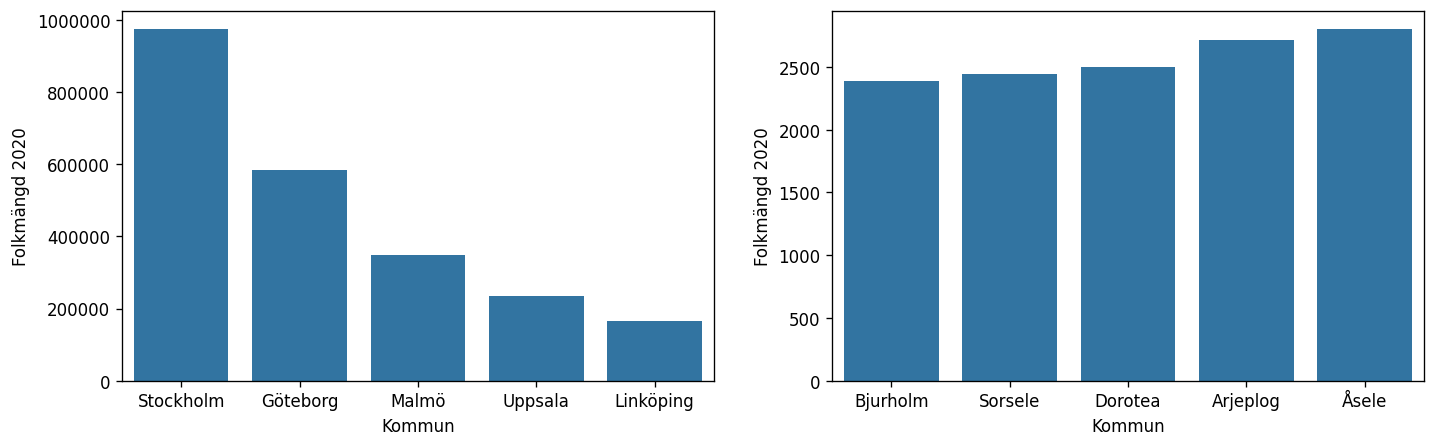

In [73]:
top5_df = df.iloc[:5]
fig, axes = plt.subplots(1, 2, dpi=120, figsize=(14, 4))
titles = ['Swedens 5 largest cities', 'Swedens 5 smallest cities']
data_frames = [top5_df, bot5_df]
x_column = ['Kommun', 'Kommun']
for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x=x_column[i], y='Folkmängd 2020', ax=axes[i])
    axes[i].ticklabel_format(style='plain', axis='y')

---

## 3. Cities in Sweden - gender (*)

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

&nbsp; a) Clean your data so that the head looks like this: (*)

Male: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 |          81 |          83 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 |          64 |          64 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|  2 |         122 |         123 | Alvesta  |            10367 |            10339 |     0.270819 | Man   |
|  3 |         255 |         255 | Aneby    |             3503 |             3498 |     0.142939 | Man   |
|  4 |         169 |         168 | Arboga   |             7094 |             7114 |    -0.281136 | Man   |

Female: 

|    |   Rang 2020 |   Rang 2019 | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |
|---:|------------:|------------:|:---------|-----------------:|-----------------:|-------------:|:-------|
|  0 |          84 |          85 | Ale      |            15612 |            15348 |     1.72009  | Kvinna |
|  1 |          64 |          64 | Alingsås |            20900 |            20774 |     0.606527 | Kvinna |
|  2 |         123 |         123 | Alvesta  |             9857 |             9795 |     0.632976 | Kvinna |
|  3 |         255 |         255 | Aneby    |             3318 |             3350 |    -0.955224 | Kvinna |
|  4 |         165 |         164 | Arboga   |             6945 |             6973 |    -0.401549 | Kvinna |


&nbsp; b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now.  (*)

|    | Kommun   |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön   |
|---:|:---------|-----------------:|-----------------:|-------------:|:------|
|  0 | Ale      |            16256 |            16054 |     1.25825  | Man   |
|  1 | Alingsås |            20702 |            20646 |     0.271239 | Man   |
|   ...  | ...       | ...  | ...   | ...  | ...    |
| 288 | Överkalix    |             1559 |             1578 |    -1.20406  | Kvinna |
| 289 | Övertorneå   |             2027 |             2065 |    -1.84019  | Kvinna |

&nbsp; c) Extract and change column name from the total DataFrame so that the head look like this: (*) 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |

&nbsp; d) Merge this data with the data in b) so that the head look like this: (*)

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

&nbsp; e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities. (*) 
 
&nbsp; f) Create a pie chart showing the total male and female population in Sweden 2020. (*)

&nbsp; g) Create a barplot showing the cities with the five largest percentual gender difference in 2020. (**)

&nbsp; h) Create a barplot showing the top 5 cities with largest populational growth from 2019 to 2020 (**)

&nbsp; i) Feel free to investigate other questions you are interested in using these datasets. (*), (**)

<br/>

<details>

<summary>Hint</summary>

f) You need to process the data first. For example

- compute difference between males and females in 2020
- use this difference to compute the differences in percentage
- sort the values by this percentage difference
- use seaborn barplot to plot, with the gender as hue

</details>

<br/>

<details>

<summary>Answer</summary>

e)

<img src="../assets/population_gender.png" height="200"/>

f)

<img src="../assets/population_genders_pie.png" height="200"/>

g)

<img src="../assets/cities_largest_gender_diff.png" height="200"/>

h)

<img src="../assets/pop_change.png" height="200"/>

</details>


# a)

In [74]:
df_kvinna = pd.read_excel(r'Databehandling\Exercises\komtopp50_2020.xlsx', header=6, usecols='A:F', sheet_name='Kvinnor')
df_kvinna.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring (%)']
df_kvinna['Kön'] = 'Kvinna'
df_man = pd.read_excel(r'Databehandling\Exercises\komtopp50_2020.xlsx', header=6, usecols='A:F', sheet_name='Män')
df_man.columns = ['Rang 2020', 'Rang 2019', 'Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring (%)']
df_man['Kön'] = 'Man'
df_kvinna['Förändring (%)'] = pd.to_numeric(df_kvinna['Förändring (%)'], errors='coerce')
df_man['Förändring (%)'] = pd.to_numeric(df_man['Förändring (%)'], errors='coerce')
df_kvinna
df_man

,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring (%),Kön
0,81,83,Ale,16256,16054,1.258253,Man
1,64,64,Alingsås,20702,20646,0.271239,Man
2,122,123,Alvesta,10367,10339,0.270819,Man
3,255,255,Aneby,3503,3498,0.142939,Man
4,169,168,Arboga,7094,7114,-0.281136,Man
...,...,...,...,...,...,...,...
285,52,55,Österåker,23647,23132,2.226353,Man
286,115,115,Östhammar,11405,11447,-0.366908,Man
287,158,156,Östra Göinge,7747,7745,0.025823,Man
288,284,284,Överkalix,1730,1737,-0.402994,Man


# b)

In [75]:
df_kön = pd.concat([df_kvinna, df_man], ignore_index=True)
df_kön = df_kön.sort_values('Kommun', ascending=True)[['Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring (%)', 'Kön']]
df_kön

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring (%),Kön
0,Ale,15612,15348,1.720094,Kvinna
290,Ale,16256,16054,1.258253,Man
1,Alingsås,20900,20774,0.606527,Kvinna
291,Alingsås,20702,20646,0.271239,Man
2,Alvesta,9857,9795,0.632976,Kvinna
...,...,...,...,...,...
287,Östra Göinge,7270,7262,0.110162,Kvinna
578,Överkalix,1730,1737,-0.402994,Man
288,Överkalix,1559,1578,-1.204056,Kvinna
289,Övertorneå,2027,2065,-1.840194,Kvinna


# c)

In [76]:
merged = pd.merge(df_kvinna, df_man, on='Kommun', suffixes=('_K', '_M'))
merged['Total pop 2020'] = df_kvinna['Folkmängd 2020'] + df_man['Folkmängd 2020']
merged['Total pop 2019'] = df_kvinna['Folkmängd 2019'] + df_man['Folkmängd 2019']
merged['Total förändring (%)'] = (df_kvinna['Förändring (%)'] + df_man['Förändring (%)']) /2
merged.dropna()[['Kommun', 'Total pop 2020', 'Total pop 2019', 'Total förändring (%)']]

,Kommun,Total pop 2020,Total pop 2019,Total förändring (%)
0,Ale,31868,31402,1.489174
1,Alingsås,41602,41420,0.438883
2,Alvesta,20224,20134,0.451898
3,Aneby,6821,6848,-0.406143
4,Arboga,14039,14087,-0.341342
...,...,...,...,...
285,Österåker,46644,45574,2.349697
286,Östhammar,22251,22250,0.015565
287,Östra Göinge,15017,15007,0.067993
288,Överkalix,3289,3315,-0.803525


# d)

In [83]:
merged_full = pd.merge(merged, df_kön, on='Kommun')
print(merged_full.sort_values(by='Total pop 2020', ascending=False).head()[['Kommun', 'Folkmängd 2020', 'Folkmängd 2019', 'Förändring (%)', 'Kön', 'Total pop 2020', 'Total pop 2019', 'Total förändring (%)']].to_string(index=False))

   Kommun  Folkmängd 2020  Folkmängd 2019  Förändring (%)    Kön  Total pop 2020  Total pop 2019  Total förändring (%)
Stockholm          482982          482220        0.158019    Man          975551          974073              0.151796
Stockholm          492569          491853        0.145572 Kvinna          975551          974073              0.151796
 Göteborg          290551          288973        0.546072 Kvinna          583056          579281              0.651427
 Göteborg          292505          290308        0.756782    Man          583056          579281              0.651427
    Malmö          175411          173543        1.076390 Kvinna          347949          344166              1.099374


# e)

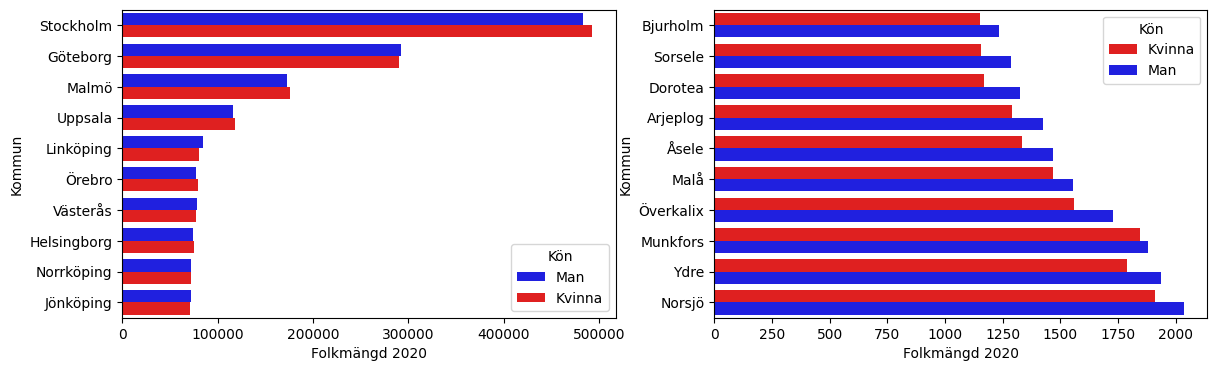

In [78]:
top10 = merged_full.sort_values(by='Total pop 2020', ascending=False).iloc[:20] # Måste välja de 20 översta eftersom att städerna i merged_full listas två gånger, en för kvinnor och en för män
bot10 = merged_full.sort_values(by='Total pop 2020', ascending=True).iloc[:20]
fig, axes = plt.subplots(1, 2, dpi=100, figsize=(14, 4))
titles = ['Könsdistribution I Sveriges 10 största städer', 'Könsdistribution I Sveriges 10 minsta städer']
data_frames = [top10, bot10]
x_column = ['Kommun', 'Kommun']
for i, (data, title) in enumerate(zip(data_frames, titles)):
    sns.barplot(data=data, x='Folkmängd 2020', y=x_column[i], ax=axes[i], hue='Kön', palette={'Kvinna': 'red', 'Man': 'blue'})

# f)

(np.float64(-1.099999999386483),
 np.float64(1.099999997041974),
 np.float64(-1.0999999964959275),
 np.float64(1.0999999998331393))

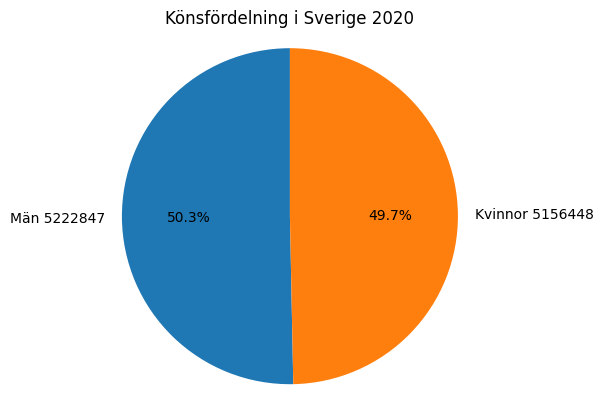

In [79]:
tot_man = sum(df_man['Folkmängd 2020'])
tot_kvinna = sum(df_kvinna['Folkmängd 2020'])
värden = [tot_man, tot_kvinna]
labels = [f'Män {tot_man}', f'Kvinnor {tot_kvinna}']
plt.pie(värden, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Könsfördelning i Sverige 2020')
plt.axis('equal')

# g)

Text(0.5, 1.0, 'Top 5 städer med störst skillnad i könsdistribution')

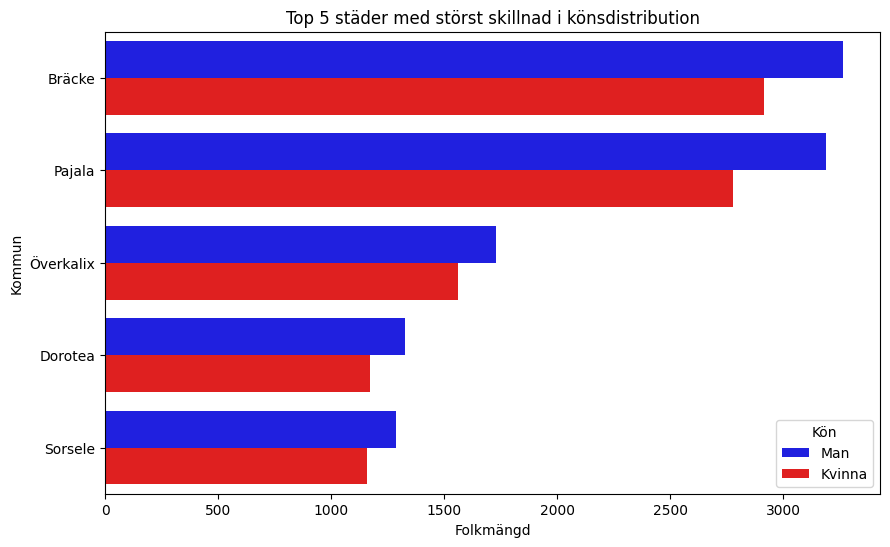

In [80]:
merged['Gender diff (%)'] = ((merged['Folkmängd 2020_K'] - merged['Folkmängd 2020_M']).abs() / merged['Total pop 2020'] * 100)
top5_diff = merged.sort_values('Gender diff (%)', ascending=False).iloc[:5]
top5_melted = top5_diff.melt(id_vars=['Kommun'], value_vars=['Folkmängd 2020_K', 'Folkmängd 2020_M'], var_name='Kön', value_name='Folkmängd')
top5_melted['Kön'] = top5_melted['Kön'].replace({'Folkmängd 2020_K': 'Kvinna', 'Folkmängd 2020_M': 'Man'})
top5_melted = top5_melted.sort_values(by='Folkmängd', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(data=top5_melted, x='Folkmängd', y='Kommun', hue='Kön', palette={'Kvinna': 'red', 'Man': 'blue'})
plt.title('Top 5 städer med störst skillnad i könsdistribution')

# h)

Text(0.5, 1.0, 'Top 5 städer med mest tillväxt')

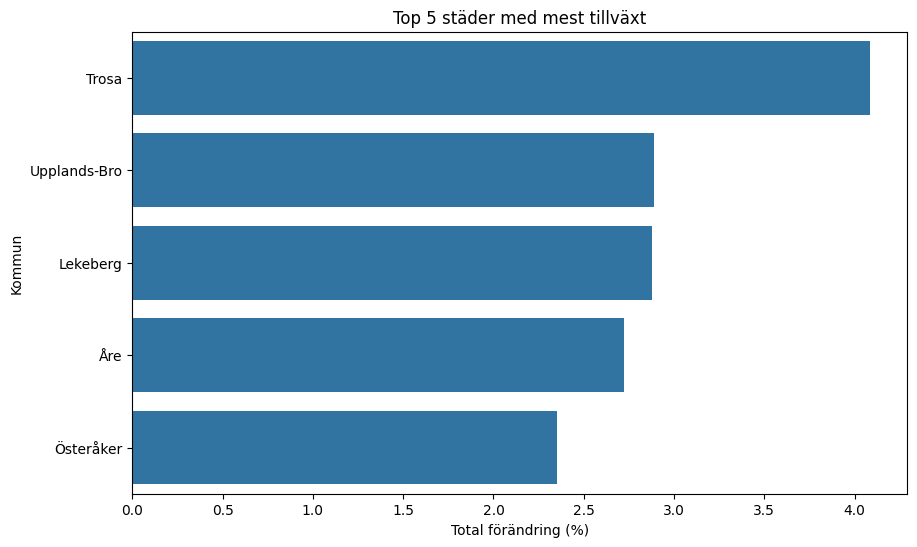

In [81]:
best5_growth = merged.sort_values(by='Total förändring (%)', ascending=False)[:5]
plt.figure(figsize=(10,6))
sns.barplot(data=best5_growth, x='Total förändring (%)', y='Kommun')
plt.title('Top 5 städer med mest tillväxt')

# i)

---

Kokchun Giang

[LinkedIn][linkedIn_kokchun]

[GitHub portfolio][github_portfolio]

[linkedIn_kokchun]: https://www.linkedin.com/in/kokchungiang/
[github_portfolio]: https://github.com/kokchun/Portfolio-Kokchun-Giang

---